In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import itertools

In [39]:
fig_size = (4, 4)

In [40]:
# G = nx.Graph([(1, 2), (1, 3), (1, 4), (3, 4), (3, 5), (4, 5), (5, 6)])

# try a random graph
# G = nx.erdos_renyi_graph(20, 0.3, seed=42, directed=False)

# try karate club graph
G = nx.karate_club_graph()

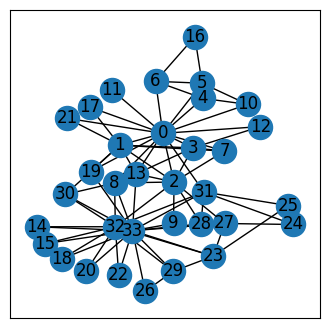

In [41]:
fig = plt.figure(figsize=fig_size)
pos = nx.kamada_kawai_layout(G)
nx.draw_networkx_labels(G,pos=pos)
nx.draw_networkx_nodes(G, pos=pos)
nx.draw_networkx_edges(G, pos=pos);

# Graph types

## Ego graph

An ego graph, also known as an ego-network graph, is a subgraph in a graph that clusters around a single node, called the ego. It consists of the ego and its neighbors and the edges connecting them to each other.

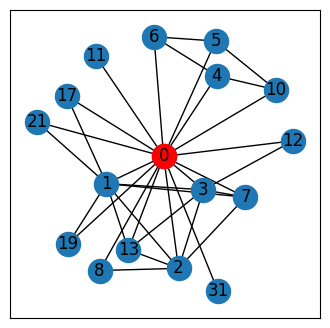

In [54]:
ego_node = 0
H = nx.ego_graph(G, ego_node) 

fig = plt.figure(figsize=fig_size)
nx.draw_networkx_labels(H, pos=pos)
nx.draw_networkx_nodes(H, pos=pos)
nx.draw_networkx_nodes(G, pos=pos, nodelist=[node], node_color='red')
nx.draw_networkx_edges(H, pos=pos);

# Concepts used to describe graphs

## Walk, trail, and path

### Walk

A walk is a finite or infinite sequence of edges which joins a sequence of vertices.

### Trail

A trail is a walk in which all edges are distinct.

### Path

A path is a trail in which all vertices (and therefore also all edges) are distinct.

## Distance (graph theory)

The distance between two vertices in a graph is the number of edges in a shortest path

Source: https://en.wikipedia.org/wiki/Distance_(graph_theory)

### Eccentricity

The eccentricity of a node v is the maximum distance from v to all other nodes in G. 

In [42]:
eccentricity = nx.eccentricity(G)
print(eccentricity)

{0: 3, 1: 3, 2: 3, 3: 3, 4: 4, 5: 4, 6: 4, 7: 4, 8: 3, 9: 4, 10: 4, 11: 4, 12: 4, 13: 3, 14: 5, 15: 5, 16: 5, 17: 4, 18: 5, 19: 3, 20: 5, 21: 4, 22: 5, 23: 5, 24: 4, 25: 4, 26: 5, 27: 4, 28: 4, 29: 5, 30: 4, 31: 3, 32: 4, 33: 4}


Here is a path:

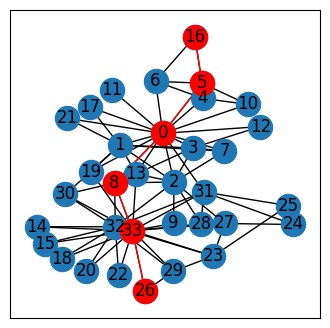

In [43]:
note_a = np.random.choice(G.nodes)
note_b = np.random.choice(G.nodes)
list_path = nx.shortest_path(G, 16, 26)
path = list(zip(list_path, list_path[1:]))

fig = plt.figure(figsize=fig_size)
nx.draw_networkx_labels(G,pos=pos)
nx.draw_networkx_nodes(G, pos=pos)
nx.draw_networkx_edges(G, pos=pos)
nx.draw_networkx_nodes(G, pos=pos, nodelist=list_path, node_color='red');
nx.draw_networkx_edges(G, pos=pos, edgelist=path, edge_color='red');

### Radius

The radius r of a graph is the minimum eccentricity of any vertex or, in symbols.

In [44]:
radius = nx.radius(G, e=eccentricity)
radius

3

### Diameter

The diameter is the maximum eccentricity.

In [45]:
nx.diameter(G)

5

### Periphery

The periphery is the set of nodes with eccentricity equal to the diameter.

In [46]:
periphery = nx.periphery(G)
periphery

[14, 15, 16, 18, 20, 22, 23, 26, 29]

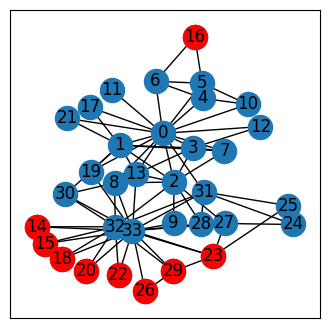

In [47]:
fig = plt.figure(figsize=fig_size)
nx.draw_networkx_labels(G,pos=pos)
nx.draw_networkx_nodes(G, pos=pos)
nx.draw_networkx_nodes(G, pos=pos, nodelist=periphery, node_color='red')
nx.draw_networkx_edges(G, pos=pos);

### Resistance distance

Returns the resistance distance between node A and node B on graph G. If weight is not provided, then a weight of 1 is used for all edges.

In [48]:
round(nx.resistance_distance(G, 6, 2), 2)

0.65

### Center

The center is the set of nodes with eccentricity equal to radius. 

center(G) = {v in G | eccentricity(v) = radius(G)}

In [49]:
center_nodes = nx.center(G)
center_nodes

[0, 1, 2, 3, 8, 13, 19, 31]

In [50]:
list(map(lambda x: x[0], filter(lambda x: radius == x[1], eccentricity.items())))

[0, 1, 2, 3, 8, 13, 19, 31]

The subset of nodes are marked red here.

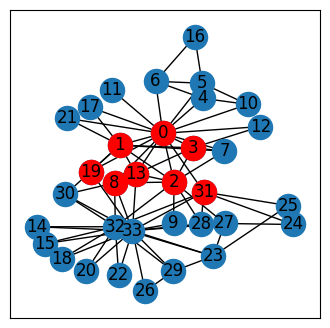

In [51]:
fig = plt.figure(figsize=fig_size)
nx.draw_networkx_labels(G,pos=pos)
nx.draw_networkx_nodes(G, pos=pos)
nx.draw_networkx_nodes(G, pos=pos, nodelist=center_nodes, node_color='red')
nx.draw_networkx_edges(G, pos=pos);

This set can be used in various ways in graph analysis, for example:

* **Identifying the most important vertices:**

Vertices at the center of a graph are often the most important or influential in the graph because they affect most other vertices in the graph.

* **Planning transport networks:**

Vertices from the center of the graph are often the best focal points, which means that they are the best starting and ending points for transport networks.

* **Community analysis:**

Vertices from the centre of a graph are often important nodes in a community network, and identifying these vertices can help to understand the structure and dynamics of that network.